In [3]:
import pandas as pd
from tiingo import TiingoClient
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

config = {}
config['api_key'] = "c11cafa88f76f02be5ebf0a7828035fe1413a65d"
SMIF_health_tickers = ['BMY', 'MDT', 'PFE','UNH','CNC']
SPY = ['SPY']
XLV = ['XLV']


client = TiingoClient(config)

start_date = '2018-09-01'
end_date = '2019-09-01'

In [4]:
#download historical data and assign variables to daily returns, daily percent returns and 1 index returns 
#for SMIF health care stocks

SMIF_health_df = client.get_dataframe(SMIF_health_tickers+SPY+XLV,
                                      metric_name='adjClose',
                                      startDate=start_date,
                                      endDate=end_date)
SMIF_health_df = SMIF_health_df.dropna()

SMIF_health_dailypctRet=SMIF_health_df/SMIF_health_df.shift(-1)-1
SMIF_health_dailypctRet = SMIF_health_dailypctRet.dropna()

SMIF_health_returns = SMIF_health_df.apply(lambda x: x/ x[0])


In [5]:
print(SMIF_health_dailypctRet.tail())
smcorr = SMIF_health_dailypctRet.drop("SPY", 1).corrwith(SMIF_health_dailypctRet.SPY)
print(smcorr)

                                BMY       MDT       PFE       UNH       CNC  \
date                                                                          
2019-08-23 00:00:00+00:00 -0.031802 -0.007859 -0.014351 -0.001818 -0.012149   
2019-08-26 00:00:00+00:00  0.003755 -0.006044  0.014560  0.036559  0.005330   
2019-08-27 00:00:00+00:00 -0.015002 -0.004259 -0.021095 -0.019441 -0.006399   
2019-08-28 00:00:00+00:00  0.008080  0.001855 -0.007076 -0.014179 -0.021589   
2019-08-29 00:00:00+00:00  0.004161 -0.000834 -0.006188 -0.014444 -0.006435   

                                SPY       XLV  
date                                           
2019-08-23 00:00:00+00:00 -0.010937 -0.010369  
2019-08-26 00:00:00+00:00  0.003939  0.005944  
2019-08-27 00:00:00+00:00 -0.006992 -0.007238  
2019-08-28 00:00:00+00:00 -0.012612 -0.007515  
2019-08-29 00:00:00+00:00  0.000435 -0.001214  
BMY    0.494460
MDT    0.592315
PFE    0.588044
UNH    0.553011
CNC    0.561049
XLV    0.857676
dtype: float64

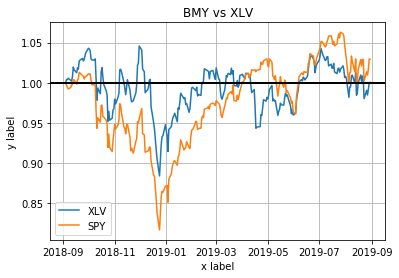

In [6]:
x = SMIF_health_returns.index
plt.plot(x,SMIF_health_returns['XLV'],label='XLV')
plt.plot(x,SMIF_health_returns['SPY'],label='SPY')
plt.xlabel('x label')
plt.ylabel('y label')
plt.grid(True)
plt.title("BMY vs XLV")
plt.axhline(y = 1, color = "black", lw = 2)

plt.legend()
#https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

In [33]:
SMIF_health_metadata = {}

for i in range (0,len(SMIF_health_tickers)):
    ticker_metadata = client.get_ticker_metadata(SMIF_health_tickers[i])
    SMIF_health_metadata[str(SMIF_health_tickers[i])] = ticker_metadata
SMIF_health_metadata

{'BMY': {'startDate': '1972-06-01',
  'endDate': '2019-09-03',
  'ticker': 'BMY',
  'description': 'Bristol-Myers Squibb is a global biopharmaceutical company whose mission is to discover, develop and deliver innovative medicines that help patients prevail over serious diseases.',
  'exchangeCode': 'NYSE',
  'name': 'BristolMyers Squibb Company'},
 'MDT': {'startDate': '1981-12-31',
  'endDate': '2019-09-03',
  'ticker': 'MDT',
  'description': 'Medtronic plc ( www.medtronic.com ), headquartered in Dublin, Ireland, is among the world’s largest medical technology, services and solutions companies – alleviating pain, restoring health and extending life for millions of people around the world. Medtronic employs more than 90,000 people worldwide, serving physicians, hospitals and patients in more than 150 countries. The company is focused on collaborating with stakeholders around the world to take healthcare Further, Together.',
  'exchangeCode': 'NYSE',
  'name': 'Medtronic Inc'},
 'PFE':

{'BMY': {'exchangeCode': 'NYSE',
  'name': 'BristolMyers Squibb Company',
  'ticker': 'BMY',
  'startDate': '1972-06-01',
  'endDate': '2019-08-30',
  'description': 'Bristol-Myers Squibb is a global biopharmaceutical company whose mission is to discover, develop and deliver innovative medicines that help patients prevail over serious diseases.'},
 'MDT': {'exchangeCode': 'NYSE',
  'name': 'Medtronic Inc',
  'ticker': 'MDT',
  'startDate': '1981-12-31',
  'endDate': '2019-08-30',
  'description': 'Medtronic plc ( www.medtronic.com ), headquartered in Dublin, Ireland, is among the world’s largest medical technology, services and solutions companies – alleviating pain, restoring health and extending life for millions of people around the world. Medtronic employs more than 90,000 people worldwide, serving physicians, hospitals and patients in more than 150 countries. The company is focused on collaborating with stakeholders around the world to take healthcare Further, Together.'},
 'PFE':

In [15]:
from openpyxl import load_workbook
from openpyxl import Workbook
dest_filename = 'C:\\Users\\Dell\\OneDrive - George Mason University\\MBA 797\\MBA 797 Analysis.xlsx'
wb = load_workbook(filename =dest_filename )

In [17]:
import sec_edgar_downloader,os
from sec_edgar_downloader import Downloader

basepath = 'C:\\Users\\Dell\\OneDrive - George Mason University\\MBA 797\\Stock Data\\'
SMIF_health_tickers = ['BMY', 'MDT', 'PFE','UNH','CNC']

for i in range (0,len(SMIF_health_tickers)):
    dl = Downloader(basepath+SMIF_health_tickers[i])
    dl.get_10k_filings(SMIF_health_tickers[i],5)
    dl.get_10q_filings(SMIF_health_tickers[i],4)

for z in range (0, len(SMIF_health_tickers)):
    filelistK =os.listdir(basepath+SMIF_health_tickers[z]+"\\sec_edgar_filings\\"+SMIF_health_tickers[z]+"\\10-K\\")
    filelistQ =os.listdir(basepath+SMIF_health_tickers[z]+"\\sec_edgar_filings\\"+SMIF_health_tickers[z]+"\\10-Q\\")
    for i in range (0, len(filelistK)):
        os.rename(basepath+SMIF_health_tickers[z]+"\\sec_edgar_filings\\"+SMIF_health_tickers[z]+"\\10-K\\"+filelistK[i], 
              basepath+SMIF_health_tickers[z]+"\\sec_edgar_filings\\"+SMIF_health_tickers[z]+"\\10-K\\"+filelistK[i][:-3]+"html")
    for i in range (0, len(filelistQ)):
        os.rename(basepath+SMIF_health_tickers[z]+"\\sec_edgar_filings\\"+SMIF_health_tickers[z]+"\\10-Q\\"+filelistQ[i], 
              basepath+SMIF_health_tickers[z]+"\\sec_edgar_filings\\"+SMIF_health_tickers[z]+"\\10-Q\\"+filelistQ[i][:-3]+"html")